# Project: Analyzing CIA Factbook Data Using SQLite and Python

# Introduction

In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()
q = "SELECT * FROM sqlite_master WHERE type='table';"
cursor.execute(q).fetchall()

[('table',
  'facts',
  'facts',
  2,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float, "created_at" datetime, "updated_at" datetime)'),
 ('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)')]

In [3]:
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [4]:
q1 = "select * from facts limit 5"
pd.read_sql_query(q1, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


# Summary Statiatics

In [6]:
q2 = '''
SELECT MIN(population) min_pop, MAX(population) max_pop, 
MIN(population_growth) min_pop_grwth, MAX(population_growth) max_pop_grwth 
from facts
'''
pd.read_sql_query(q2, conn)


,min_pop,max_pop,min_pop_grwth,max_pop_grwth
0,0,7256490011,0.0,4.02


# Outliers

In [14]:
q3 = '''
select *
from facts
where population == (select max(population) from facts);
'''
pd.read_sql_query(q3, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


In [16]:
q4 = '''
select *
from facts
where population == (select min(population) from facts);
'''
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


It seems like the table contains a row for the whole world, which explains the population of over 7.2 billion. It also seems like the table contains a row for Antarctica, which explains the population of 0.

# Histograms

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64ee7077b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f64ee94bd68>]], dtype=object)

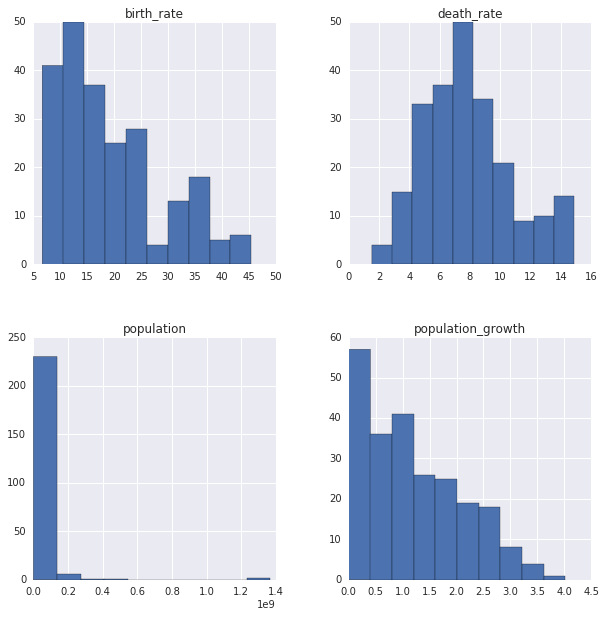

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q5 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
pd.read_sql_query(q5, conn).hist(ax=ax)

# Which countries have highest population density?

In [24]:
q6 = '''SELECT name AS Country, ROUND(CAST(population as float) /CAST(area_land as float),3) AS density FROM facts
WHERE population != (select max(population) from facts)
AND population != (select min(population) from facts)
ORDER BY density DESC'''
pd.read_sql_query(q6,conn)

,Country,density
0,Macau,21168.964
1,Monaco,15267.500
2,Singapore,8259.785
3,Hong Kong,6655.271
4,Gaza Strip,5191.819
5,Gibraltar,4876.333
6,Bahrain,1771.859
7,Maldives,1319.641
8,Malta,1310.016
9,Bermuda,1299.926


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f64ee5e8fd0>], dtype=object)

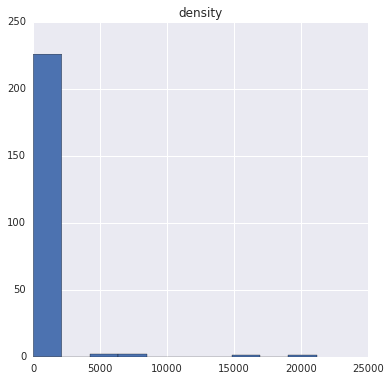

In [29]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
q7 =  '''SELECT ROUND(CAST(population as float) /CAST(area_land as float),3) AS density FROM facts
WHERE population != (select max(population) from facts)
AND population != (select min(population) from facts)'''
pd.read_sql_query(q7,conn).hist(ax=ax)

# Which countries have the highest ratios of water to land?

In [32]:
q7 = '''SELECT name AS Country, ROUND(CAST(area_water as float) /CAST(area_land as float),3) AS Water_Land_Ratio FROM facts
WHERE population != (select max(population) from facts)
AND population != (select min(population) from facts)
ORDER BY Water_Land_Ratio DESC LIMIT 20'''
pd.read_sql_query(q7,conn)


,Country,Water_Land_Ratio
0,Virgin Islands,4.520
1,Puerto Rico,0.555
2,"Bahamas, The",0.387
3,Guinea-Bissau,0.285
4,Malawi,0.259
5,Netherlands,0.226
6,Uganda,0.223
7,Eritrea,0.164
8,Liberia,0.156
9,Bangladesh,0.141
